In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd
data=pd.read_csv("/gdrive/My Drive/Fake News/Complete_processed_news_data.csv")
data.head()

,Unnamed: 0,News,Result
0,0,washington reuters head conservative republica...,0
1,1,washington reuters transgender people allowed ...,0
2,2,washington reuters special counsel investigati...,0
3,3,washington reuters trump campaign adviser geor...,0
4,4,seattle washington reuters president donald tr...,0


In [ ]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
data.head()

,News,Result
0,washington reuters head conservative republica...,0
1,washington reuters transgender people allowed ...,0
2,washington reuters special counsel investigati...,0
3,washington reuters trump campaign adviser geor...,0
4,seattle washington reuters president donald tr...,0


Train and Test data

In [ ]:
X=data['News']
Y=data['Result']
#train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)


In [ ]:
#printing the shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(31428,)
(31428,)
(13470,)
(13470,)


## TF-IDF Vectorization

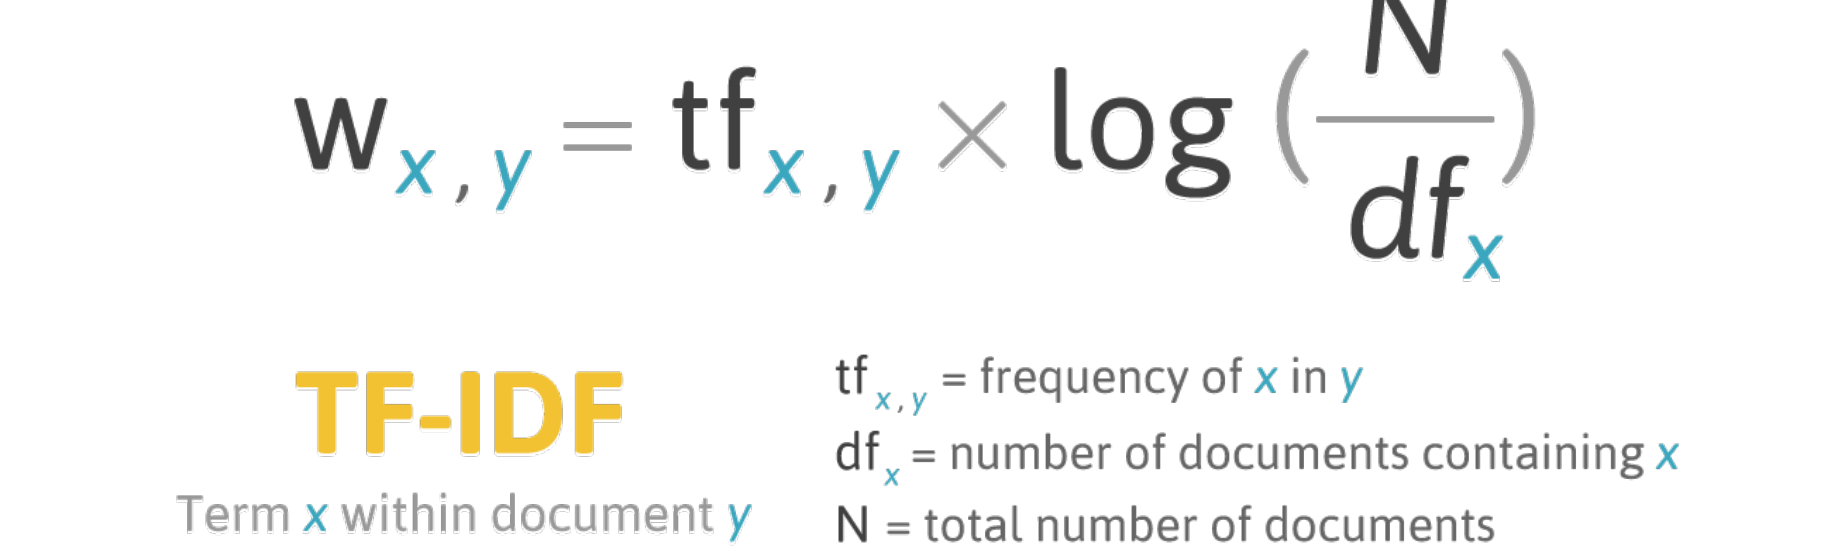
1. TF-IDF which stands for Term Frequency – Inverse Document Frequency.
2. It is one of the most important techniques used for information retrieval to represent how important a specific word or phrase is to a given document.
3. Implement using TfidfVectorizer from sklearn library.


In [ ]:
#Converting words into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=1500,ngram_range=(2,2))
x_train_tf=tf.fit_transform(x_train.values.astype('U')).toarray()

## Model Development using TF - IDF Vectorizer

In [ ]:
#Model Development
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mul_nb=MultinomialNB()
mul_nb.fit(x_train_tf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#prediction for multinomial Naivebayes
x_test_tf=tf.transform(x_test.values.astype('U')).toarray()



In [ ]:
pred_mul_nb=mul_nb.predict(x_test_tf)

In [ ]:
#Evaluation metrics for Multinomial Naive bayes
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,pred_mul_nb)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,pred_mul_nb)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,pred_mul_nb)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[6096  283]
 [ 383 6708]]
The accuracy score for the model is :  0.9505567928730512
The classification report for the model :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      6379
           1       0.96      0.95      0.95      7091

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



In [ ]:
#2.NaiveBayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_tf,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#prediction for naivebayes
pred_nb=nb.predict(x_test_tf)
pred_nb

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
#Evaluation metrics for Naive bayes
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,pred_nb)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,pred_nb)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,pred_nb)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[6226  153]
 [ 807 6284]]
The accuracy score for the model is :  0.9287305122494433
The classification report for the model :
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      6379
           1       0.98      0.89      0.93      7091

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



In [ ]:
#3.Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,criterion='gini')
rf.fit(x_train_tf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#prediction for randomforest
pred_rf=rf.predict(x_test_tf)
print(pred_rf)

[1 1 0 ... 1 1 0]


In [ ]:
#Evaluation metrics for Random Forest
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,pred_nb)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,pred_nb)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,pred_nb)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[6226  153]
 [ 807 6284]]
The accuracy score for the model is :  0.9287305122494433
The classification report for the model :
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      6379
           1       0.98      0.89      0.93      7091

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



In [ ]:
#4.Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=300,random_state=1)
adb.fit(x_train_tf, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=300, random_state=1)

In [ ]:
#prediction for adabosst
pred_adb=adb.predict(x_test_tf)
print(pred_adb)

[0 1 0 ... 1 1 0]


In [ ]:
#Evaluation metrics for AdaboostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,pred_adb)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,pred_adb)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,pred_adb)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[6091  288]
 [ 161 6930]]
The accuracy score for the model is :  0.9666666666666667
The classification report for the model :
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      6379
           1       0.96      0.98      0.97      7091

    accuracy                           0.97     13470
   macro avg       0.97      0.97      0.97     13470
weighted avg       0.97      0.97      0.97     13470

